# Teamwork
<pre>26.12.2121
Hranush Sahradyan
Varduhi Beglaryan
Ara Stepanyan</pre>

## Assagniment
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Our goal is to classify does the patient has heart disease or not.

### Attribute Information
1.Age: age of the patient [years]<br></br>
2.Sex: sex of the patient [M: Male, F: Female]<br></br>
3.ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br></br>
4.RestingBP: resting blood pressure [mm Hg]<br></br>
5.Cholesterol: serum cholesterol [mm/dl]<br></br>
6.FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br></br>
7.RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br></br>
8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br></br>
9.ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br></br>
10.Oldpeak: oldpeak = ST [Numeric value measured in depression]<br></br>
11.ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br></br>
12.HeartDisease: output class [1: heart disease, 0: Normal]<br></br>


more info on https://www.kaggle.com/fedesoriano/heart-failure-prediction

## Data  and Feature Analysis

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('heart.csv')
train=df.sample(frac=0.8,random_state=100) #random state is a seed value
test=df.drop(train.index)

Within the framework of the competition, we will divide the data into two parts: test-train(8:2 ratio)․
We will use the test data to evaluate the final model at the end․

In [29]:
train.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
428,62,M,ASY,110,0,0,Normal,120,Y,0.5,Flat,1
424,60,M,NAP,120,0,1,Normal,141,Y,2.0,Up,1
799,53,M,NAP,130,246,1,LVH,173,N,0.0,Up,0
173,49,M,NAP,140,187,0,Normal,172,N,0.0,Up,0
391,70,M,ASY,115,0,0,ST,92,Y,0.0,Flat,1
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
48,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat,0
696,35,M,ASY,120,198,0,Normal,130,Y,1.6,Flat,1
838,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1
269,47,F,NAP,130,235,0,Normal,145,N,2.0,Flat,0


In [30]:
train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.486376,132.291553,198.416894,0.224796,137.328338,0.887193,0.549046
std,9.393720,18.846099,108.277374,0.417732,25.165099,1.076070,0.497928
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,0.000000,138.500000,0.600000,1.000000
75%,60.000000,140.000000,267.750000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [31]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 428 to 831
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 74.5+ KB
None


As we can see, there are no null values, so there is no need to handle missing values.

In [32]:
train['HeartDisease'].value_counts()

1    403
0    331
Name: HeartDisease, dtype: int64

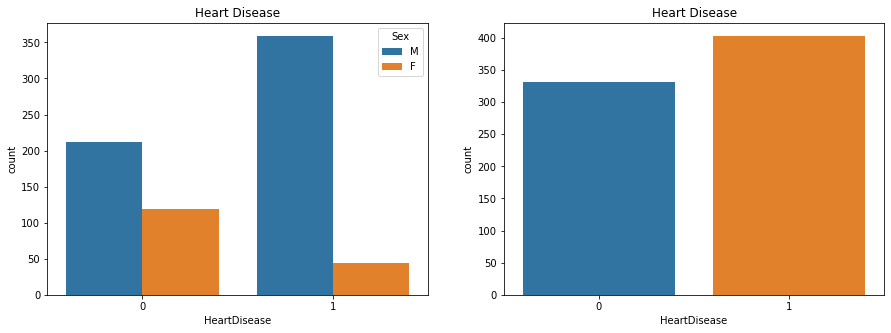

In [33]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="HeartDisease", hue="Sex", data=train,ax=ax[0])
ax[0].set_title('Heart Disease')
sns.countplot('HeartDisease',data=train,ax=ax[1])
ax[1].set_title('Heart Disease')
plt.show()

In [34]:
train.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex  HeartDisease
F    0               119
     1                44
M    0               212
     1               359
Name: HeartDisease, dtype: int64

We can say that the data is balanced․ Also it seems taht men are more likely to have heart disease. In our case, 63% of male patients have heart disease and only 27% of female patients ․ But also we must take into account that in our case the number of male patients is significantly higher (78%). So I consider that this is important feature.
I change it from categoric to numerical.

In [35]:
train['Sex']=[0 if x == 'F' else 1 for x in train['Sex']] 

Let's understand other categoric features.

In [36]:
categoric_fs=[i for i in train.columns if train.dtypes[i]=='object']
categoric_fs

['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [37]:
train[categoric_fs].nunique()

ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

Let's plot categoric features with label. 

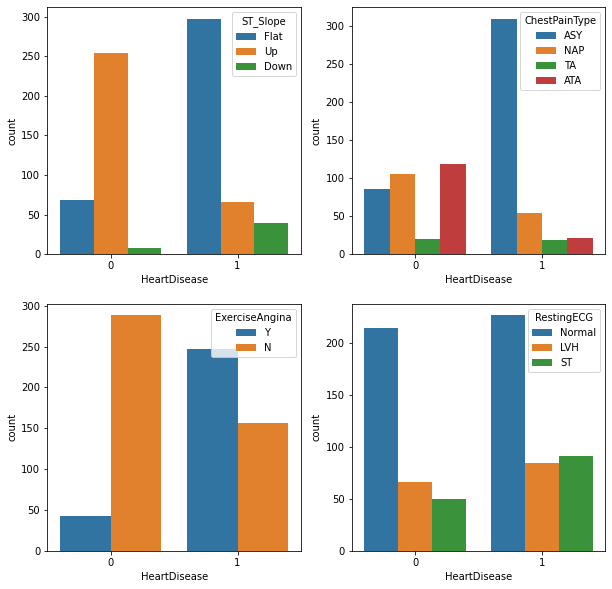

In [38]:
f,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x="HeartDisease", hue="ST_Slope", data=train,ax=ax[0][0])
sns.countplot('HeartDisease',hue="ChestPainType",data=train,ax=ax[0][1])
sns.countplot('HeartDisease',hue="ExerciseAngina",data=train,ax=ax[1][0])
sns.countplot('HeartDisease',hue="RestingECG",data=train,ax=ax[1][1])
plt.show()

We can see that some of these features are more informative than the others.For example we can see that the patient who has 'ASY' chest pain type is more likely to have a heart desease.

In [39]:
train.groupby(['ChestPainType','HeartDisease'])['HeartDisease'].count()

ChestPainType  HeartDisease
ASY            0                86
               1               309
ATA            0               119
               1                21
NAP            0               106
               1                54
TA             0                20
               1                19
Name: HeartDisease, dtype: int64

From our 403 heart disease cases 309 (77%) of them has a 'ASY' chest pain type. And only 5% has 'ATA' type. There is a big difference․ Same is for 'ST_Slope' feature.

In [40]:
train.groupby(['ST_Slope','HeartDisease'])['HeartDisease'].count()

ST_Slope  HeartDisease
Down      0                 8
          1                40
Flat      0                69
          1               297
Up        0               254
          1                66
Name: HeartDisease, dtype: int64

I consider that simple label encoding for these categoric features is not the best aproach but it is simple and fast and there is no need to deeply explore features so I  am going to use it.

In [42]:
categoric_fs=[i for i in train.columns if train.dtypes[i]=='object']
train[categoric_fs] = train[categoric_fs].astype('category')
train.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

In [43]:
for i in categoric_fs:
    train[i] = train[i].cat.codes

In [44]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
428,62,1,0,110,0,0,1,120,1,0.5,1,1
424,60,1,2,120,0,1,1,141,1,2.0,2,1
799,53,1,2,130,246,1,0,173,0,0.0,2,0
173,49,1,2,140,187,0,1,172,0,0.0,2,0
391,70,1,0,115,0,0,2,92,1,0.0,1,1


There is no more categoric features in our dataset so we can already try some models.
I will use gride sarch method on out train data and find the best classifier based on the accuracy.

## Finding best model with GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
xTrain=train[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
yTrain=train['HeartDisease']

## SVM

In [503]:
from sklearn.svm import SVC
svc=SVC()
parameters = {'kernel':('poly','rbf'), 'degree':[3,4,5],'C':[10,100,1000],'class_weight':('balanced',None)}

In [504]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xTrain)
xTrain1=scaler.transform(xTrain)

In [505]:
clf1=GridSearchCV(estimator=svc,param_grid=parameters)

In [506]:
clf1.fit(xTrain1,yTrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000],
                         'class_weight': ('balanced', None),
                         'degree': [3, 4, 5], 'kernel': ('poly', 'rbf')})

In [507]:
clf1.best_score_

0.848783897120492

In [508]:
clf1.best_params_

{'C': 10, 'class_weight': None, 'degree': 3, 'kernel': 'rbf'}

## Random Forest¶

In [368]:
from sklearn.ensemble import RandomForestClassifier

In [369]:
rm=RandomForestClassifier()
parameters={'class_weight':('balanced','balanced_subsample',None),'criterion':('gini', 'entropy'),'max_depth':[3,5,10],'min_samples_leaf':[1,3,5],'bootstrap':[True,False]}

In [370]:
clf2=GridSearchCV(estimator=rm,param_grid=parameters)

In [371]:
clf2.fit(xTrain,yTrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ('balanced', 'balanced_subsample',
                                          None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 3, 5]})

In [372]:
clf2.best_score_

0.8665175659304818

In [373]:
clf2.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1}

## AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
parameters={'learning_rate':[0.1,0.01,0.08,0.05],'n_estimators':[50,300,150]}

In [431]:
clf3=GridSearchCV(estimator=adb,param_grid=parameters)

In [432]:
clf3.fit(xTrain,yTrain)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.08, 0.05],
                         'n_estimators': [50, 300, 150]})

In [433]:
clf3.best_score_

0.8678501537601342

In [434]:
clf3.best_params_

{'learning_rate': 0.05, 'n_estimators': 300}

## Neural network model

In [443]:
from sklearn.neural_network import MLPClassifier

In [444]:
mlp = MLPClassifier()
parameters={'solver':['lbfgs','adam'],'activation':['tanh', 'relu'],'learning_rate_init':[0.001,0.01,0.005,0.1],'learning_rate':['constant','adaptive']}

In [445]:
clf4=GridSearchCV(estimator=mlp,param_grid=parameters)

In [446]:
clf4.fit(xTrain,yTrain)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.005, 0.1],
                         'solver': ['lbfgs', 'adam']})

In [447]:
clf4.best_score_

0.847423352902805

In [448]:
clf4.best_params_

{'activation': 'relu',
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'solver': 'lbfgs'}

## KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

In [66]:
xTrain_normilized=normalize(xTrain)

In [67]:
knnclf = KNeighborsClassifier()
parameters={'n_neighbors':[3,4,5,6,7],'weights':('uniform', 'distance'),'algorithm':('auto', 'ball_tree', 'brute')}

In [68]:
clf5=GridSearchCV(estimator=knnclf,param_grid=parameters)

In [69]:
clf5.fit(xTrain_normilized,yTrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'brute'),
                         'n_neighbors': [3, 4, 5, 6, 7],
                         'weights': ('uniform', 'distance')})

In [70]:
clf5.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

In [71]:
clf5.best_score_

0.6961513372472277

## Ridge classifier

In [72]:
from sklearn.linear_model import RidgeClassifier

In [73]:
ridgeclf=RidgeClassifier()
parameters={'alpha':[0.01,0.1,1,10],'class_weight':('balanced',None),'solver':('auto','sag','svd'),'normalize':[True,False]}

In [74]:
clf6=GridSearchCV(estimator=ridgeclf,param_grid=parameters)

In [75]:
clf6.fit(xTrain,yTrain)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'class_weight': ('balanced', None),
                         'normalize': [True, False],
                         'solver': ('auto', 'sag', 'svd')})

In [76]:
clf6.best_score_

0.8515049855558662

In [77]:
clf6.best_params_

{'alpha': 1, 'class_weight': 'balanced', 'normalize': True, 'solver': 'auto'}

## Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
grdb=GradientBoostingClassifier()
parameters={'loss':['deviance', 'exponential'],'learning_rate':[0.1,0.01,0.08,0.05],'n_estimators':[100,300,150],'criterion':['mae','friedman_mse']}

In [80]:
clf7=GridSearchCV(estimator=grdb,param_grid=parameters)

In [82]:
clf7.fit(xTrain,yTrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mae', 'friedman_mse'],
                         'learning_rate': [0.1, 0.01, 0.08, 0.05],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 300, 150]})

In [83]:
clf7.best_score_

0.8637778399030844

In [84]:
clf7.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.08,
 'loss': 'exponential',
 'n_estimators': 100}

### Results for test data based on the best model

At first let's do the same changes for test data.

In [47]:
test['Sex']=[0 if x == 'F' else 1 for x in test['Sex']] 

In [48]:
categoric_fs=[i for i in test.columns if test.dtypes[i]=='object']
test[categoric_fs] = test[categoric_fs].astype('category')

In [49]:
for i in categoric_fs:
    test[i] = test[i].cat.codes


In [50]:
yTest=test['HeartDisease']    
xTest=test[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]    

In [51]:
final_model=AdaBoostClassifier(learning_rate=0.05,n_estimators=300)

In [52]:
final_model.fit(xTrain,yTrain)

AdaBoostClassifier(learning_rate=0.05, n_estimators=300)

In [53]:
predictions=final_model.predict(xTest)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
yTest.value_counts()

1    105
0     79
Name: HeartDisease, dtype: int64

In [56]:
target_names = ['Have a HD', 'Dont have a HD']
print(classification_report(yTest,predictions, target_names=target_names))

                precision    recall  f1-score   support

     Have a HD       0.86      0.80      0.83        79
Dont have a HD       0.86      0.90      0.88       105

      accuracy                           0.86       184
     macro avg       0.86      0.85      0.85       184
  weighted avg       0.86      0.86      0.86       184



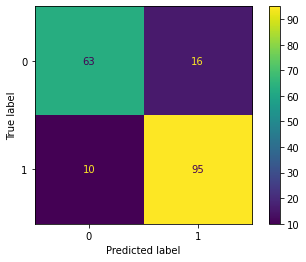

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, xTest, yTest)  
plt.show()

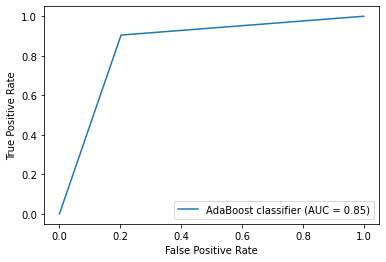

In [58]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='AdaBoost classifier')
display.plot()
plt.show()

<br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br>

Just for visualization

In [75]:
from sklearn.manifold import TSNE

In [76]:
df=pd.read_csv('heart.csv')
data = df.drop(['HeartDisease'], axis=1)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [77]:
categoric_fs=[i for i in data.columns if data.dtypes[i]=='object']
data[categoric_fs] = data[categoric_fs].astype('category')

In [78]:
for i in categoric_fs:
    data[i] = data[i].cat.codes

In [79]:
tsne=TSNE(n_iter=300).fit_transform(data)
data = pd.DataFrame(data = tsne, columns = ['component 1', 'component 2'])
finalDf = pd.concat([data, df[['HeartDisease']]], axis = 1)

In [80]:
train=finalDf.sample(frac=0.8,random_state=100) #random state is a seed value
test=finalDf.drop(train.index)

In [81]:
yTest=test['HeartDisease']    
xTest=test[['component 1', 'component 2']]    
yTraint=train['HeartDisease']    
xTrain=train[['component 1', 'component 2']]    

In [82]:
final_model=AdaBoostClassifier(learning_rate=0.05,n_estimators=300)

In [83]:
final_model.fit(xTrain,yTrain)

AdaBoostClassifier(learning_rate=0.05, n_estimators=300)

In [84]:
final_model.score(xTest,yTest)

0.6630434782608695

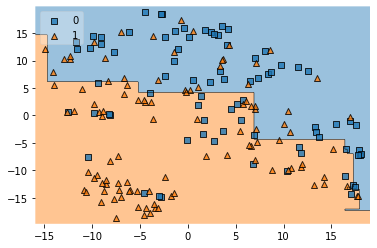

In [85]:
from mlxtend.plotting import plot_decision_regions
xTest=xTest.to_numpy()
yTest=yTest.to_numpy()

plot_decision_regions(xTest, yTest, clf=final_model, legend=2)
plt.show()